In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\kirta\OneDrive\Desktop\Projects\Customer_Churn_Prediction\customer_churn_data.csv")

In [3]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [4]:
df["InternetService"] = df["InternetService"].fillna("")

In [5]:
df.isnull().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [6]:
df.duplicated().sum()   

np.int64(0)

In [7]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [8]:
numeric_columns_data = df.select_dtypes(include=["number"])

In [9]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


<Axes: ylabel='count'>

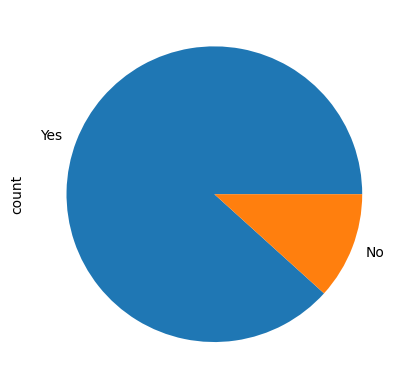

In [10]:
df["Churn"].value_counts().plot(kind= "pie")

<Axes: xlabel='Churn'>

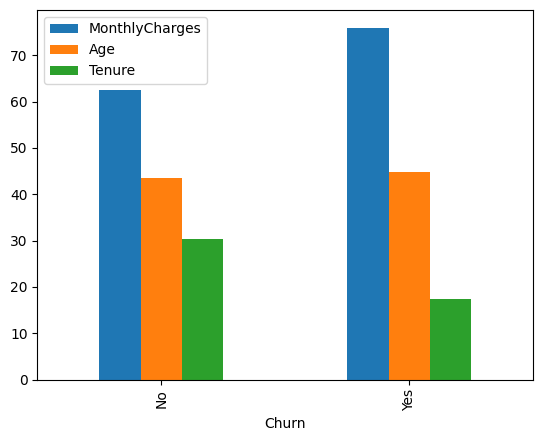

In [11]:
df.groupby("Churn")[["MonthlyCharges","Age","Tenure"]].mean().plot(kind="bar")

In [12]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [13]:
X = df[["Age","Gender","Tenure","MonthlyCharges"]]

In [14]:
y = df[["Churn"]]

In [15]:
X


,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [16]:
X["Gender"] = X["Gender"].map(lambda X: 1 if X == "Female" else 0)

C:\Users\kirta\AppData\Local\Temp\ipykernel_11860\779849016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Gender"] = X["Gender"].map(lambda X: 1 if X == "Female" else 0)


In [17]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [18]:
y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [19]:
y["Churn"] = y["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

C:\Users\kirta\AppData\Local\Temp\ipykernel_11860\165212660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Churn"] = y["Churn"].apply(lambda x : 1 if x == "Yes" else 0)


In [20]:
y["Churn"]

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Churn, Length: 1000, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
scaler.fit_transform(X_train)

array([[ 0.56050126, -1.06458129, -0.64577722,  0.66952468],
       [ 1.68945781,  0.93933644,  1.01126107,  1.08501278],
       [-1.28688217, -1.06458129,  0.2629212 ,  1.1596374 ],
       ...,
       [ 0.76576609, -1.06458129,  1.06471391,  1.65324815],
       [-0.15792563,  0.93933644, -1.01994715,  1.15497336],
       [ 0.76576609, -1.06458129, -0.21815444,  1.14214725]],
      shape=(800, 4))

In [24]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [25]:
X_test = scaler.fit_transform(X_test)

In [26]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
    print("Accuracy Score: {}".format(accuracy_score(y_test, predictions)))

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [29]:
log_model.fit(X_train, y_train)

c:\Users\kirta\OneDrive\Desktop\Projects\Customer_Churn_Prediction\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [30]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
log_model.score(X_test, y_test)

0.88

In [32]:
y_pred = log_model.predict(X_test)

In [33]:
modelperformance(y_pred)

Accuracy Score: 0.88


In [34]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p' : [1, 2],  # 1: Manhattan, 2: Euclidean
    'leaf_size': [20, 30, 40]
    }

In [35]:
gridknn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

In [36]:
gridknn.fit(X_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'algorithm': ['auto', 'ball_tree', ...], 'leaf_size': [20, 30, ...], 'n_neighbors': [3, 5, ...], 'p': [1, 2], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,9


In [37]:
gridknn.best_params_

{'algorithm': 'auto',
 'leaf_size': 20,
 'n_neighbors': 9,
 'p': 2,
 'weights': 'uniform'}

In [38]:
y_pred = gridknn.predict(X_test)

In [39]:
modelperformance(y_pred)

Accuracy Score: 0.88


In [40]:
from sklearn.svm import SVC
scm = SVC()


In [41]:
param_grid = {
    'C': [0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'poly', 'rbf']
}

In [42]:
gridscv = GridSearchCV(scm, param_grid, cv=5)
gridscv.fit(X_train, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'kernel': ['linear', 'poly', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.01


In [43]:
y_pred = gridknn.predict(X_test) 
modelperformance(y_pred)

gridscv.best_params_

Accuracy Score: 0.88


{'C': 0.01, 'kernel': 'linear'}

In [44]:
gridscv.score(X_test, y_test)

0.88

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [46]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,10, 20 , 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'splitter': ['best', 'random']
}

In [47]:
grid_tree = GridSearchCV(dtc, param_grid, cv=5)

In [48]:
grid_tree.fit(X_train, y_train)
y_pred = grid_tree.predict(X_test)
modelperformance(y_pred) 

Accuracy Score: 0.88


In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [52]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': [2,3,4],
    'bootstrap': [True, False]
}

In [53]:
rfc_grid = GridSearchCV(rfc, param_grid, cv=5)
rfc_grid.fit(X_train, y_train)  
y_pred = rfc_grid.predict(X_test)
modelperformance(y_pred)

Accuracy Score: 0.88


In [55]:
rfc_grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 100}

In [58]:
from xgboost import XGBClassifier

In [59]:
xgb = XGBClassifier()

In [60]:
param_grid = {
    'n_estimators': [100, 200],           # Number of trees (not too many)
    'max_depth': [3, 5],                  # Depth of trees
    'learning_rate': [0.05, 0.1],         # Step size (lower = slower learning)
    'subsample': [0.8],                   # Sample ratio per tree (fixed to avoid overfitting)
    'colsample_bytree': [0.8],            # Feature ratio per tree
}


In [61]:
xgb_grid = GridSearchCV(xgb, param_grid, cv=5)
xgb_grid.fit(X_train, y_train)  

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.8], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5], 'n_estimators': [100, 200], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [62]:
y_pred = xgb_grid.predict(X_test)
modelperformance(y_pred)

Accuracy Score: 0.88


In [63]:
best_model = xgb_grid.best_estimator_

In [66]:
joblib.dump(best_model, "model.pkl")

['model.pkl']

In [67]:
X.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')